### Nagrinėkime realesnį pavyzdį:
### Atsisiųskime vaizdų

In [1]:
# pip install openimages

In [2]:
import os
from openimages.download import download_dataset

In [3]:
data_dir = "data"
## Tarkime turime nedaug duomenų
number_for_samples = 100
classes = ["Apple", "Motorcycle", "Human body"]

In [4]:
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [5]:
print("Downloading is starting...")
download_dataset(data_dir, classes, limit=number_for_samples)

2024-02-17  14:34:03 INFO Downloading 100 train images for class 'apple'
100%|██████████| 100/100 [00:06<00:00, 15.38it/s]
2024-02-17  14:34:10 INFO Downloading 100 train images for class 'motorcycle'
100%|██████████| 100/100 [00:06<00:00, 14.85it/s]
2024-02-17  14:34:17 INFO Downloading 100 train images for class 'human body'
100%|██████████| 100/100 [00:06<00:00, 16.01it/s]


{'apple': {'images_dir': 'data\\apple\\images'},
 'motorcycle': {'images_dir': 'data\\motorcycle\\images'},
 'human body': {'images_dir': 'data\\human body\\images'}}

In [6]:
import torch
import torchvision

In [7]:
from torchvision import datasets
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
from skimage import io
from skimage.transform import resize
import glob
import PIL
import matplotlib.pyplot as plt

In [8]:
# tipinės transformacijos vaizdams


In [10]:
scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

In [11]:
def read_img(file_name):
    img = Image.open(file_name)
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    return t_img.float()

In [12]:
## Apsibrėžiame vaizdų transformacijas -- augmentacijas

In [14]:
transform = transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20),
    transforms.ToTensor()
])

In [15]:
dataset = datasets.ImageFolder("data/", transform = transform)

In [16]:
#dataset.imgs

In [17]:
train_dataset = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

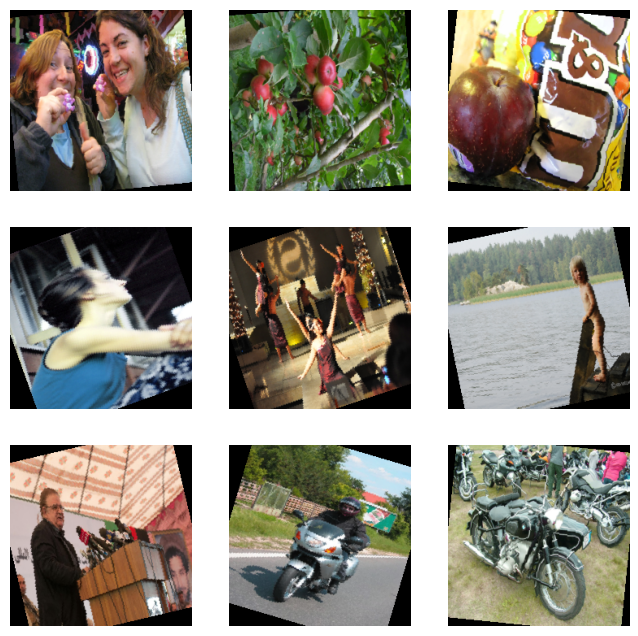

In [22]:


figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    #plt.title(labels_map[label])
    im = img.permute(1, 2, 0)
    plt.axis("off")
    plt.imshow(im.squeeze(), cmap="gray")
plt.show()

torch.Size([224, 224, 3])


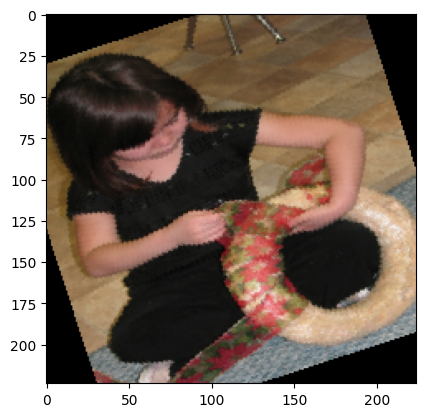

In [19]:
images, labels = next(iter(train_dataset))
im = images.permute(0, 2, 3, 1)
print(im[0].shape)
plt.imshow(im[0])